Action: race: 100%|██████████| 4/4 [00:00<00:00,  7.91it/s]


'neutral'

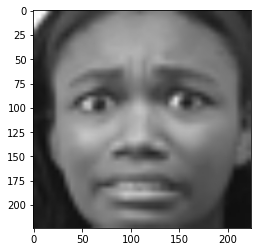

In [15]:

from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/Images0.jpeg')
plt.imshow(img)
predections = DeepFace.analyze(img)
predections['dominant_emotion']

In [26]:

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray, 1.1,4)
#Draw a rectangle around the faces
for (x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

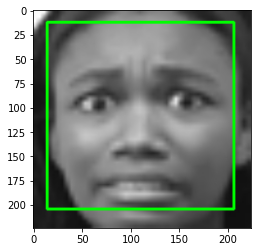

In [30]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [32]:
from deepface import DeepFace

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(1)
if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
  ret, frame = cap.read()
  result = DeepFace.analyze(frame, actions = ['emotion'])
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

  faces = faceCascade.detectMultiScale(gray, 1.1, 4)

  for (x, y, w , h) in faces:
    cv2.rectangle(frame, (x,y), (x + w, y + h), (0,255,0), 2)
  font = cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(frame, result['dominant_emotion'],
              (50,50),
              font, 3, (0,0,255),
              2, cv2.LINE_4)
  cv2.imshow('Original video', frame)
  if cv2.waitKey(2) & 0xFF == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()

  

OSError: ignored